# New Section

Preprocessed Data (First 5 rows):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0               

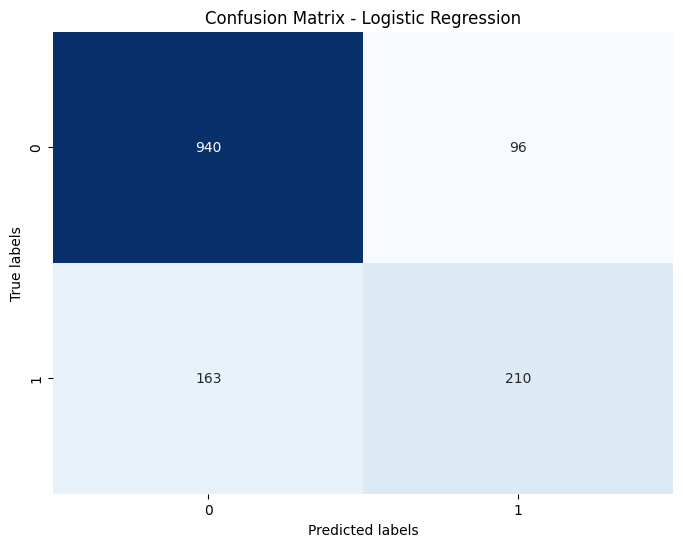


Random Forest Model:
Accuracy: 0.7998580553584103
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



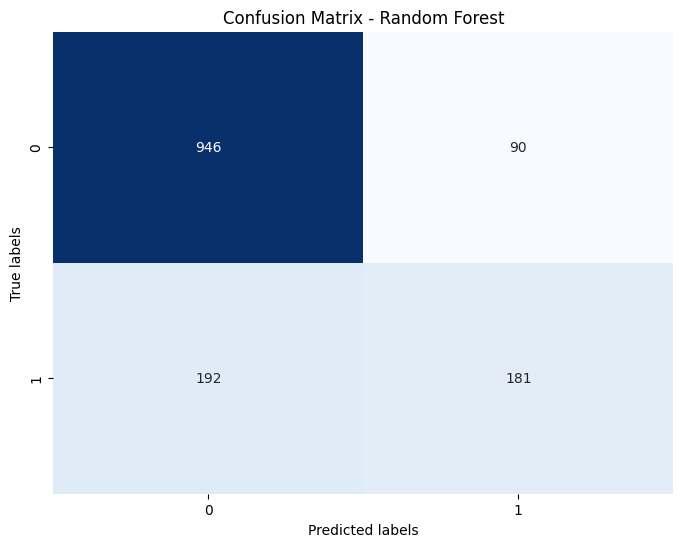

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Customer Churn Prediction/Telco Customer Churn.csv')

# Preprocessing
data.drop('customerID', axis=1, inplace=True)
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
print("Preprocessed Data (First 5 rows):")
print(data.head())
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
plot_confusion_matrix(y_test, log_reg_predictions, title='Confusion Matrix - Logistic Regression')

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
plot_confusion_matrix(y_test, rf_predictions, title='Confusion Matrix - Random Forest')
